# Pulling Stock Data
This is a Python notebook to get Stock data based on ticker symbols.

That data can then be used for a D3 visualization like: https://bl.ocks.org/mbostock/1256572

## 0. Programming in Python
Let's start by seeing how to make variables, functions, and logic in Python.

### Variables
Variables can take on many data types, from `'Strings'` to numbers (`0`), `True`/`False` and even functions.

Type `x = 'Hello world!'` in the box below, then press `Shift + Enter` to execute the code.

Nothing happened... That's because we've only just created the variable `x`. Now to show the value of the variable, we need to type `x`. Again, press `Shift + Enter` to execute the code.

### Functions
Functions can take on any name - you get to choose - but the syntax for defining a function is always the same. Functions can also operate on one or more `variable` that gets defined when you initially create the function. These variables are a placeholder for what to do with any data that gets sent to the function when it is used.
- First, define the name of the function with `def nameOfFunction():`
- Then, if you want to send a variable to the function, put that variable name between the ().
- Lastly, on the next line, tab in one tab, and write the instructions for what the function will do.

Below, type `def myFunction(y):` on the first line, then tab in and type `return y + 3`.  Press `Shift + Enter` to save that functions.

In the box below that, type `myFunction(3)` - what do you expect it to return when you press `Shift + Enter`?

### Logic
Logic is the last piece of the programming foundation; this will test some comparison, and depending on whether the comparison is `True` or `False`, one outcome will result.

We've put the basic structure in the box below, but you need to add a comparison in the `()` to test: e.g. `(5 > 3)` or `('a' == 'a')`. Press `Shift + Enter` to run the logic below.

In [1]:
if ():
   print 'The comparison is True'
else:
   print 'The comparison is False'

The comparison is False


### Wrap Up
So that's it!  Variables, functions, and logic are the building blocks of programming in any language.

Now that you've got a handle on those, we're going to get a bit more complicated working with our data.

*Note: Just like above, you'll need to press `Shift + Enter` to run any code in an `In [ ]:` box.*

## 1. Sourcing Data
To begin working with our data, let's use an API called [Quandl](https://www.quandl.com) to bring in stock data.

We need to first `import quandl` to get the Quandl library of functions, then set our API key. The key for today is `Byjzu4U8rmR1iEhZnp7V` - copy and paste that between the `""` below.

In [2]:
!pip install quandl
import quandl
quandl.ApiConfig.api_key = "Byjzu4U8rmR1iEhZnp7V"

Now that we've got our connection to quandl, let's pull a single stock (`AAPL`) and store that in a variable called `data`.

Add `WIKI/AAPL` between the `""` below.

In [3]:
data = quandl.get("WIKI/AAPL", rows=5)

To find out the type of data, we can type `print type(data)`.

In [4]:
print type(data)

<class 'pandas.core.frame.DataFrame'>


And if we want to look at the data itself, we can write `data` below.

In [5]:
data

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-09-12,162.61,163.96,158.770,160.82,71139119.0,0.0,1.0,162.61,163.96,158.770,160.82,71139119.0
2017-09-13,159.87,159.96,157.910,159.65,44393752.0,0.0,1.0,159.87,159.96,157.910,159.65,44393752.0
2017-09-14,158.99,159.40,158.090,158.28,23073646.0,0.0,1.0,158.99,159.40,158.090,158.28,23073646.0
2017-09-15,158.47,160.97,158.000,159.88,48203642.0,0.0,1.0,158.47,160.97,158.000,159.88,48203642.0
2017-09-18,160.11,160.50,157.995,158.67,27939718.0,0.0,1.0,160.11,160.50,157.995,158.67,27939718.0


To assess the health of each stock, let's find the `Close` price for each stock. If you notice above, that's the 4th column.

Based on Quandl's [API documentation](https://docs.quandl.com/docs/time-series-2), we can extract just that column by adding `.4` after `WIKI/AAPL` to get `WIKI/AAPL.4`:

In [6]:
data = quandl.get("WIKI/AAPL.4", rows=5, collapse='monthly')
data

,Close
Date,
1980-12-31,34.13
1981-01-31,28.25
1981-02-28,26.50
1981-03-31,24.50
1981-04-30,28.38


That's great! But now we want to show data for the last 10 years.

First, we need to have Python tell us what today's date is. We've written most of this for you, but you need to add a line to output the value of `start_date`.

In [7]:
import datetime
start_date = (datetime.datetime.now() - datetime.timedelta(days=10*365)).strftime('%Y-%m-01')
start_date

'2007-09-01'

Now we need to add a new parameter to our Quandl get request. After `collapse='monthly'`, add a comma and then `start_date=start_date` inside the parenthesis.

Then, to save space in the notebook, we're only going to show the top five rows of data using `data.head(5)`.

How could you show the top 10 rows instead?

In [8]:
data = quandl.get("WIKI/AAPL.4", start_date=start_date, rows=120, collapse='monthly')
data.head(10)

,Close
Date,
2007-09-30,153.47
2007-10-31,189.95
2007-11-30,182.22
2007-12-31,198.08
2008-01-31,135.36
2008-02-29,125.02
2008-03-31,143.50
2008-04-30,173.95
2008-05-31,188.75


Python comes with a number of great visualization tools built in.

Let's do a quick visualization of the data to see if it looks right:

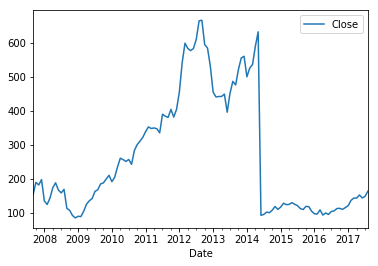

In [9]:
%matplotlib inline
ax = data.plot()

Uh-oh! Looks like there's a problem: There's a big drop in AAPL stock in 2014!

Why?!  Well, a quick Google shows they [split their stock](https://www.washingtonpost.com/news/the-switch/wp/2014/06/09/apples-stock-price-just-dropped-more-than-500-a-share-but-dont-panic/). 

Luckily, Quandl has accounted for that. Instead of `Close`, we'll need to use the `Adjusted Close` price (column 11) from Quandl.

Modify the code below to get the 11th column instead of the 4th.

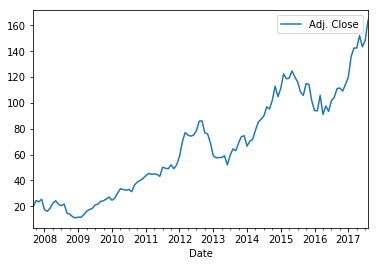

In [10]:
data = quandl.get("WIKI/AAPL.11", rows=120, collapse='monthly', start_date=start_date)
ax = data.plot()

Great! Let's get it ready for D3.js

## 2. Scrubbing Data

Based on the [D3.js show reel](https://bl.ocks.org/mbostock/1256572), we need the data to be arranged like this:

```
symbol,date,price
MSFT,Jan 2000,39.81
MSFT,Feb 2000,36.35
MSFT,Mar 2000,43.22
MSFT,Apr 2000,28.37
MSFT,May 2000,25.45```

Let's choose a few symbols from the list of Warren's companies and pull the data we need.

First, we need to bring in the cleaned CSV file we exported from Open Refine, and store it as a variable. Let's call it `buffet`.

In [30]:
from pandas import read_csv
buffet = read_csv('https://raw.githubusercontent.com/DecodedCo/ibm-cbd/python/WB_portfolio_for_Decoded%20-%202017_0824.csv')
buffet.head(5)

,COMPANY,TICKER,COMPANY.1,# OF SHARES,PRICE (8/24/2017),CITY,PURCHASE DATE,REGION,CEO,EMPLOYEES,WARREN COMMENT
0,Kraft Heinz,KHC,Kraft Heinz (KHC),"325,634,818",$82.80,"Chicago, IL",9/27/2005,Central,Bernard Hees (2015–),"41,000 (2017)",Without a doubt
1,Wells Fargo,WFC,Wells Fargo (WFC),"467,987,270",$52.16,"San Francisco, CA",7/7/2002,West,"Timothy J. Sloan (Oct 12, 2016–)",NaN,It is decidedly so
2,Apple Inc.,AAPL,Apple Inc. (AAPL),"130,191,960",$159.27,"Cupertino, CA",9/23/2006,West,Tim Cook,NaN,Concentrate and ask again
3,The Coca Cola Company,KO,The Coca Cola Company (KO),"400,000,000",$45.41,"Atlanta, GA",12/10/2003,Southeast,"James Quincey (May 1, 2017–)",NaN,Reply hazy try again
4,American Express Co,AXP,American Express Co (AXP),"151,610,700",$85.36,"New York City, NY",6/2/2013,Northeast,Kenneth I. Chenault (Jan 2001–),NaN,It is decidedly so


Next we want to choose some of those stocks for our analysis. We could either type out the ticker symbol (e.g. `MSFT`) by hand, or we could refer to the `buffet` variable in order to select the ticker symbols. Let's choose the first 3 stocks from `buffet`. Replace `buffet[0:0]` with `buffet[0:3]`:

In [12]:
symbols = [ 'WIKI/%s.11' % ticker for ticker in buffet.TICKER[0:3] ]
symbols

['WIKI/KHC.11', 'WIKI/WFC.11', 'WIKI/AAPL.11']

We can now load in the symbol data from quandl:

In [13]:
data = quandl.get(symbols, rows=120, collapse='monthly', start_date=start_date)
data.head(5)

,WIKI/KHC - Adj. Close,WIKI/WFC - Adj. Close,WIKI/AAPL - Adj. Close
Date,,,
2007-09-30,NaN,27.366091,19.723034
2007-10-31,NaN,26.129162,24.411222
2007-11-30,NaN,25.166378,23.417810
2007-12-31,NaN,23.428090,25.456041
2008-01-31,NaN,26.446814,17.395647


Let's clean up the column name to just their symbol name by removing `WIKI/` and ` - Close` from each column name.

We can iterate over the columns using the `for col in data.columns` syntax:

In [14]:
data.columns = [col.replace(' - Adj. Close','').replace('WIKI/','') for col in data.columns]
data.head(5)

,KHC,WFC,AAPL
Date,,,
2007-09-30,NaN,27.366091,19.723034
2007-10-31,NaN,26.129162,24.411222
2007-11-30,NaN,25.166378,23.417810
2007-12-31,NaN,23.428090,25.456041
2008-01-31,NaN,26.446814,17.395647


Let's have another quick look at the data, to make sure everything looks good.

Add the code to plot the `data` (hint: you've used this code above already):

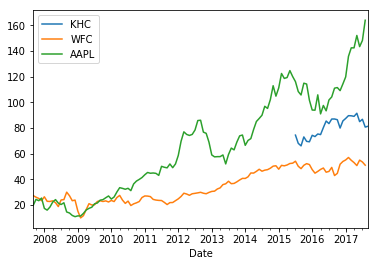

In [15]:
ax = data.plot()

It looks like we have some incomplete data.

Further investigation reveals that we only have data for Kraft Heinz (KHC) from July 2015 to September 2017, and we're missing September 2017 for WFC and AAPL. We'll need to remember this for later, as this might affect our analysis.

## 3. Analysis

What type of analysis would be most useful for Warren?

What if we could predict the future behavior of each stock based on its past behavior?  We might be able to project stock performance forward to determine which will do well, and which might not.

So, given a series of prices over many different timesteps, how can we predict the price of the next future timestep?

### 3.1 Building the Algorithm

In this subsection we will incrementally build an algorithm for prediction.

With start with a simple estimation - the average of the series of prices:

66.4554790961


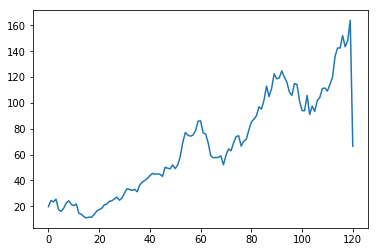

In [16]:
import numpy as np
import matplotlib.pyplot as plt

apple = data['AAPL'].iloc[:-1].values  # convert the Apple data in to an array (easy to use format)

def average(series):
    return float(sum(series))/len(series)

pred = average(apple)

print(pred)
ax = plt.plot(np.append(apple,pred))

We can see from a quick look at the plot above, that this prediction would be a big drop from the last price for Apple stock, which was 164.0. That's predicting a loss of over $97!

The problem is that we are taking an average over the entire time series, and that hasn't taken in to account the change over time. One way we can solve this is by taking a 'moving average' that only takes an average of the last *n* stocks

<img src='https://raw.githubusercontent.com/DecodedCo/ibm-cbd/python/movingavg.png'>

150.063120124


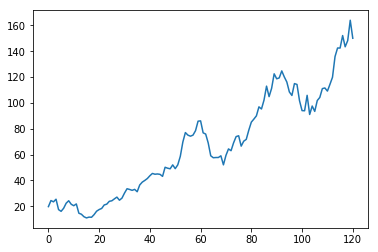

In [17]:
def moving_average(series, n):
    return average(series[-n:])

pred = moving_average(apple, 5)

print(pred)
ax = plt.plot(np.append(apple,pred))

That looks better, but we're still taking a flat average across all our stock prices, when clearly the most recent ones are the most important.

To prioritze the most recent, we can multiply each of the last *n* stock prices by a number, called a weight, and then take an average. NOTE: these weights should increase in the direction of time and always add up to 1!

<img src = 'https://raw.githubusercontent.com/DecodedCo/ibm-cbd/python/weightedavg.png'>

153.976417255


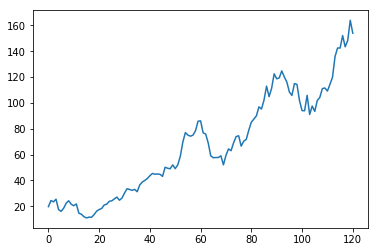

In [18]:
def weighted_average(series, weights):
    result = 0.0
    weights.reverse()
    for n in range(len(weights)):
        result += series[-n-1] * weights[n]
    return result

weights = [0.1, 0.2, 0.3, 0.4]
pred = weighted_average(apple, weights)

print(pred)
x = np.append(apple,pred)
ax = plt.plot(np.append(apple,pred))

Better still. But what if we want to do this for all the data?

One clever trick, devised by mathematicians Poisson, Holt and Roberts, is to use many overlapping weighted averages of length 2. This translates to the formula

$$ \hat{y}_t = \alpha y_t + (1 - \alpha)\hat{y}_{t-1} $$

where $\hat{y}_t$ is the predicted price at time *t*, and $\alpha$ is the one value we use to calculate the two weights, $\alpha$ and $(1 - \alpha)$.

This formula is *recursive*, meaning that it creates a prediction, and then uses that prediction to calculate the next:

<img src = 'https://raw.githubusercontent.com/DecodedCo/ibm-cbd/python/expsmooth.png'>

In [19]:
def exponential_smoothing(series, alpha, predictions = 3):
    smoothed = [series[0]] # first value is same as series
    for n in range(1, len(series) + predictions):
        if n >= len(series): # we are forecasting
            value = smoothed[-1]
        else:
            value = series[n]
        smoothed.append(alpha * value + (1 - alpha) * smoothed[n-1]) 
    return smoothed

results = exponential_smoothing(apple,0.9)
results[-3:]

[162.38447499888809, 162.38447499888809, 162.38447499888809]

But we have the problem that we will always underestimate an upwards trend and vice versa. To account for this we consider the **trend**, which is the gradient between two adjacent points, as well as the **level** (their weighted mean).

With exponential smoothing, we just itereatively updated the level. Now, with *double* exponential smoothing, we iteratively update the level *and* trend in the same way, and then add them together to make our prediction:

In [20]:
def double_exponential_smoothing(series, alpha, beta, predictions = 3):
    smoothed = [series[0]]
    for n in range(1, len(series)+ predictions):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # we are forecasting
            value = smoothed[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        smoothed.append(level+trend)
    return smoothed


### 3.2 Prediction

Now let's see our results, using some common standards for our values of $\alpha$ and $\beta$.

You can experiment with their values and see how this affects our results:

[190.02867863593335, 203.78720100425448, 217.54572337257562]


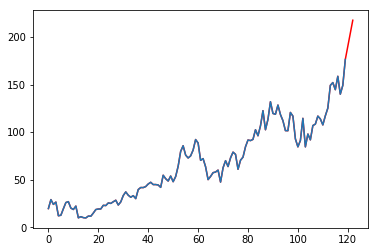

In [21]:
results = double_exponential_smoothing(apple, alpha = 0.9, beta = 0.9)

print(results[-3:])
_, ax = plt.subplots()
ax.plot(results, color = "red"), ax.plot(results[:-3])
plt.show()

And voila! We have predicted the future.

The three numbers above represent the next 3 forecasted prices for Apple stock. Note that it is not recommended to use this approach to forecast more than 3 time steps ahead, as this model is not sophisticated enough to handle much future uncertainty.

This is a simplistic introduction to time series analysis. If you'd like to like to investigate further, we recommend following the introduction here:

https://datascience.ibm.com/exchange/public/entry/view/815137c868b916821dec777bdc23013c

## 4. Preparing for Visualization

Let's see how our results look.

### 4.1 Replotting with forecasts

First, we need to calculate our predictions for each stock and append them to the end of our dataframe:

In [22]:
!pip install --upgrade pandas # upgrade pandas
import pandas as pd

data = data.reindex(pd.date_range("2007-09-30", "2017-12-31", freq = '1M'), fill_value="NaN")

for i, column in enumerate(data):
    if column == 'KHC': # select only the range of dates for which we have data
        stock = data[column].iloc[94:-3].values
    else:
        stock = data[column].iloc[:-4].values
    forecast = double_exponential_smoothing(stock, alpha = 0.9, beta = 0.9, predictions = 3) # create our forecast
    
    col_forecast = pd.Series(forecast[-3:], index = pd.date_range("2017-10-31", "2017-12-31", freq = '1M'))
    data[column].iloc[-3:] = col_forecast
    
data.tail(6)

Requirement already up-to-date: pandas in ./common/.virtualenv/python2/lib/python2.7/site-packages
Requirement already up-to-date: pytz>=2011k in ./common/.virtualenv/python2/lib/python2.7/site-packages (from pandas)
Requirement already up-to-date: python-dateutil in ./common/.virtualenv/python2/lib/python2.7/site-packages (from pandas)
Requirement already up-to-date: numpy>=1.7.0 in ./common/.virtualenv/python2/lib/python2.7/site-packages (from pandas)
Requirement already up-to-date: six>=1.5 in ./common/.virtualenv/python2/lib/python2.7/site-packages (from python-dateutil->pandas)


,KHC,WFC,AAPL
2017-07-31,86.8326,53.5505,148.248
2017-08-31,80.75,51.07,164
2017-09-30,81.4,NaN,NaN
2017-10-31,79.4133,46.6828,190.029
2017-11-30,78.6489,44.3509,203.787
2017-12-31,77.8846,42.0189,217.546


Now that we've added our predictions, let's visualize the results!

Below, we create two overlapping plots, one with the existing data and one with our forecasts, marked in red. So that we can see the relative trends, we'll only look at the range where we have data for KHC:

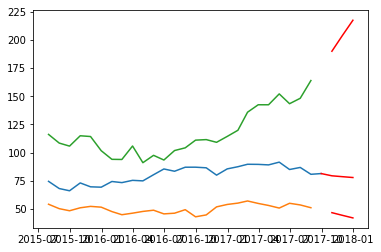

In [23]:
fig, ax = plt.subplots()
ax.plot(data.iloc[94:-3])
ax.plot(data.iloc[-4:], color = "Red")

plt.show()

What do you notice about our forecasts?

### 4.2 Exporting for further visualization

Next, we want to rearrange all of the data to be more like what we need for D3. Python comes with a function called `unstack()` that does just that!

Below, make a variable called `datalist` and set it equal to `data.unstack()`.

Then show the top 10 rows of the datalist. (Hint, you've used this type of function before)

In [24]:
datalist = data.unstack()
datalist.head(10)

KHC  2007-09-30    NaN
     2007-10-31    NaN
     2007-11-30    NaN
     2007-12-31    NaN
     2008-01-31    NaN
     2008-02-29    NaN
     2008-03-31    NaN
     2008-04-30    NaN
     2008-05-31    NaN
     2008-06-30    NaN
dtype: object

Almost there! We've done the hard work, now we just need it in a CSV format.

We've written this bit of code to clean the data a bit more and to output the data in a comma-separated value format.

In [29]:
csv = datalist.to_csv(header=True, index_label=['symbol','date','price'], date_format='%b %Y', index=True)
csv = csv.replace("price,0","price") # remove addition of ',0' on first line
print csv

symbol,date,price
KHC,Sep 2007,
KHC,Oct 2007,
KHC,Nov 2007,
KHC,Dec 2007,
KHC,Jan 2008,
KHC,Feb 2008,
KHC,Mar 2008,
KHC,Apr 2008,
KHC,May 2008,
KHC,Jun 2008,
KHC,Jul 2008,
KHC,Aug 2008,
KHC,Sep 2008,
KHC,Oct 2008,
KHC,Nov 2008,
KHC,Dec 2008,
KHC,Jan 2009,
KHC,Feb 2009,
KHC,Mar 2009,
KHC,Apr 2009,
KHC,May 2009,
KHC,Jun 2009,
KHC,Jul 2009,
KHC,Aug 2009,
KHC,Sep 2009,
KHC,Oct 2009,
KHC,Nov 2009,
KHC,Dec 2009,
KHC,Jan 2010,
KHC,Feb 2010,
KHC,Mar 2010,
KHC,Apr 2010,
KHC,May 2010,
KHC,Jun 2010,
KHC,Jul 2010,
KHC,Aug 2010,
KHC,Sep 2010,
KHC,Oct 2010,
KHC,Nov 2010,
KHC,Dec 2010,
KHC,Jan 2011,
KHC,Feb 2011,
KHC,Mar 2011,
KHC,Apr 2011,
KHC,May 2011,
KHC,Jun 2011,
KHC,Jul 2011,
KHC,Aug 2011,
KHC,Sep 2011,
KHC,Oct 2011,
KHC,Nov 2011,
KHC,Dec 2011,
KHC,Jan 2012,
KHC,Feb 2012,
KHC,Mar 2012,
KHC,Apr 2012,
KHC,May 2012,
KHC,Jun 2012,
KHC,Jul 2012,
KHC,Aug 2012,
KHC,Sep 2012,
KHC,Oct 2012,
KHC,Nov 2012,
KHC,Dec 2012,
KHC,Jan 2013,
KHC,Feb 2013,
KHC,Mar 2013,
KHC,Apr 2013,
KHC,May 2013,
KHC,Jun 2013,
KH

We could copy & paste this into a new CSV file for our D3.js visualization, or we could write code to do that for us.

To make the downloadable file, we've got to bring in a library called `base64` which will encode the file. Then we use that to create the file and add a bit of HTML to make it so we can download the file.

In [26]:
import base64
from IPython.display import HTML

b64 = base64.b64encode(csv.encode())
payload = b64.decode()
html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{filename}</a>'
html = html.format(payload=payload,title="stocks.csv",filename="stocks.csv")
HTML(html)
